In [ ]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3129, done.
remote: Counting objects: 100% (3129/3129), done.
remote: Compressing objects: 100% (2663/2663), done.
remote: Total 3129 (delta 786), reused 1312 (delta 422), pack-reused 0
Receiving objects: 100% (3129/3129), 33.40 MiB | 30.05 MiB/s, done.
Resolving deltas: 100% (786/786), done.


In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1684828 sha256=8bb395c296a79e4705a2d0df5e10432f5a3413dd76b59fbc5f442f9e99f35028
  Stored in directory: /tmp/pip-ephem-wheel-cache-twqrrvn5/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=4be4938649b8244d55fe682b1b7ee8a3e590c7ab6194eb0f99a64c3c6ce992b2
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=eec17a5dd74fdf6f1d4d76160fac3a6b9a3dd1ad36efea3adf3efc4a34d7c3f9
  Stored in directory: /root/.cache/pip/w



  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
def load_image_into_numpy_array(path):
    image = None
    if path.startswith('http'):
        response = urlopen(path)
        image_data = response.read()
        image_data = BytesIO(image_data)
        image = Image.open(image_data)
    else:
        image_data = tf.io.gfile.GFile(path, 'rb').read()
        image = Image.open(BytesIO(image_data))

    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (1, im_height, im_width, 3)).astype(np.uint8)

In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops
%matplotlib inline

In [ ]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS)

In [ ]:
url       = 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
print("Loading ...")
detector  = hub.load(url)
print("Done ...")

Loading ...
Done ...


In [ ]:
img = load_image_into_numpy_array("https://s28258.pcdn.co/wp-content/uploads/2017/10/WhimsySoul-dublin-blog-20.jpg")

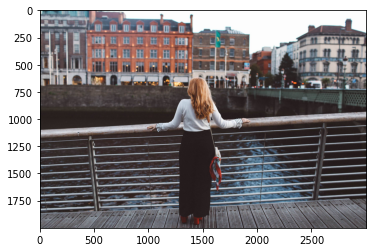

In [ ]:
plt.imshow(img[0])

In [ ]:
result = detector(img)

In [ ]:
result

{'anchors': <tf.Tensor: shape=(49152, 4), dtype=float32, numpy=
 array([[   0.      ,    0.      ,   45.254837,   22.627415],
        [   0.      ,    0.      ,   90.509674,   45.25483 ],
        [   0.      ,    0.      ,  181.01935 ,   90.50966 ],
        ...,
        [ 962.7452  ,  917.49036 , 1024.      , 1024.      ],
        [ 917.49036 ,  826.98065 , 1024.      , 1024.      ],
        [ 826.98065 ,  645.9613  , 1024.      , 1024.      ]],
       dtype=float32)>,
 'box_classifier_features': <tf.Tensor: shape=(300, 9, 9, 1536), dtype=float32, numpy=
 array([[[[0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0

In [ ]:
result = {key:value.numpy() for key,value in result.items()}
print(result.keys())

dict_keys(['rpn_box_predictor_features', 'num_proposals', 'detection_anchor_indices', 'detection_boxes', 'rpn_box_encodings', 'box_classifier_features', 'rpn_objectness_predictions_with_background', 'class_predictions_with_background', 'refined_box_encodings', 'image_shape', 'raw_detection_boxes', 'final_anchors', 'detection_classes', 'detection_masks', 'rpn_features_to_crop', 'anchors', 'mask_predictions', 'proposal_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'proposal_boxes_normalized'])


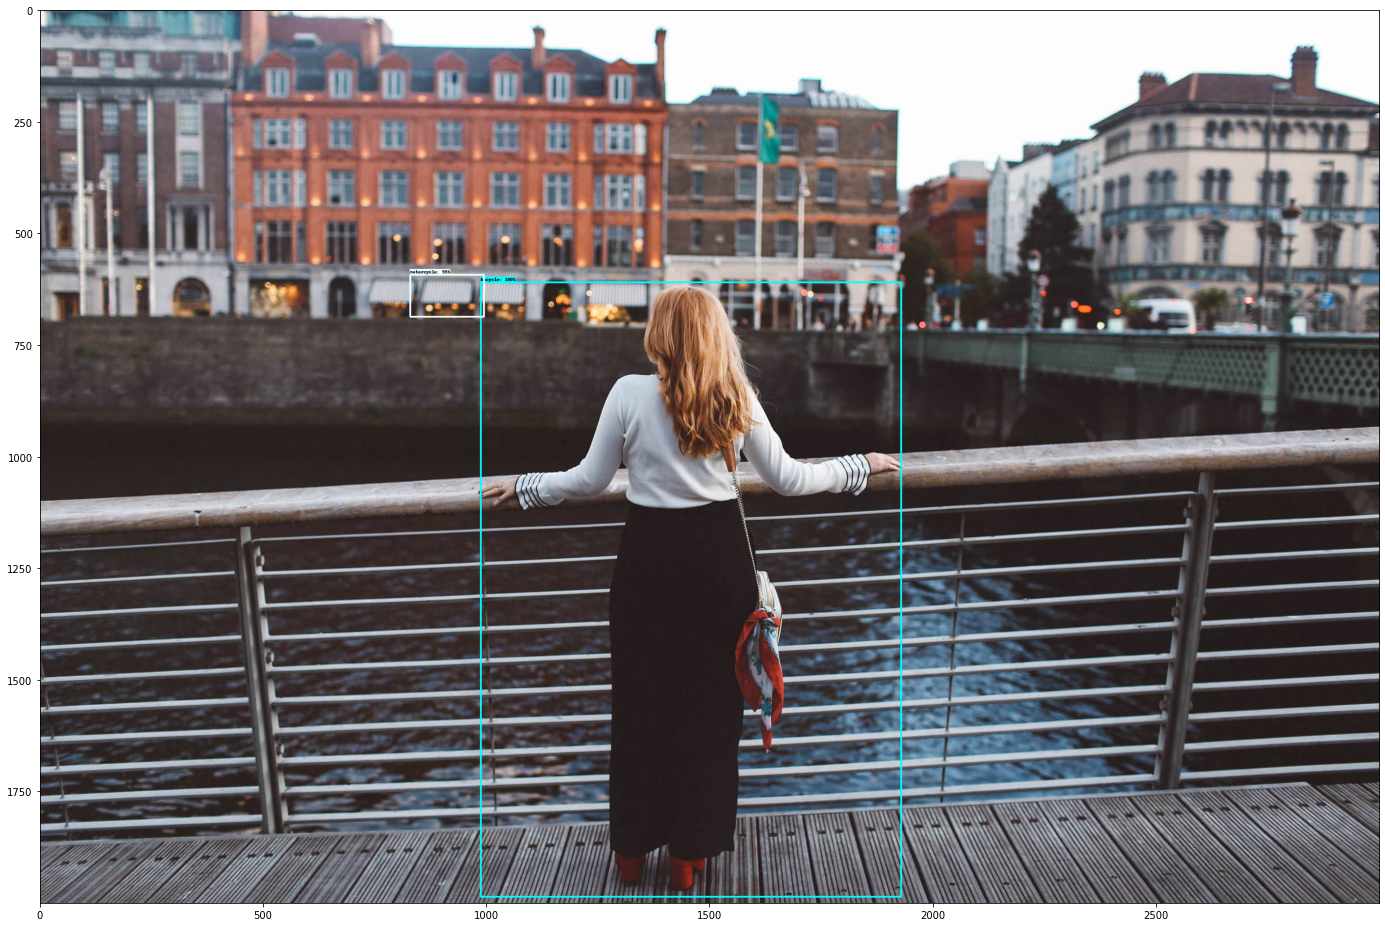